In [66]:
import tushare as ts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

ts.set_token('4b8f14b8f61d132d377af041f006e83816dab1895caaa8d8c81e4f1a')

In [19]:
df = ts.get_k_data('000002', start='2020-01-01', end='2021-01-01')

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


/opt/anaconda3/envs/hoho_RL/lib/python3.9/site-packages/tushare/stock/trading.py:706: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(_get_k_data(url, dataflag,


In [20]:
df.head()

,date,open,close,high,low,volume,code
0,2020-01-02,30.533,30.293,31.333,30.243,1012130.0,000002
1,2020-01-03,30.443,29.783,30.543,29.513,805536.0,000002
2,2020-01-06,29.483,29.243,29.493,28.983,876840.0,000002
3,2020-01-07,29.343,29.493,29.663,29.083,577933.0,000002
4,2020-01-08,29.033,29.413,29.503,28.783,529996.0,000002


In [15]:
# df = ts.get_tick_data('000002', date='2018-12-12', src='tt')

In [16]:
# df = ts.get_index()

In [21]:
df = df.set_index('date')

In [23]:
df.head()

,open,close,high,low,volume,code
date,,,,,,
2020-01-02,30.533,30.293,31.333,30.243,1012130.0,000002
2020-01-03,30.443,29.783,30.543,29.513,805536.0,000002
2020-01-06,29.483,29.243,29.493,28.983,876840.0,000002
2020-01-07,29.343,29.493,29.663,29.083,577933.0,000002
2020-01-08,29.033,29.413,29.503,28.783,529996.0,000002


In [24]:
df['close-open'] = (df['close'] - df['open']) / df['open']
df['high-low'] = (df['high'] - df['low']) / df['low']
df['pre_close'] = df['close'].shift(1)  
df['price_change'] = df['close'] - df['pre_close']  # 当天股价变化
df['p_change'] = (df['close'] - df['pre_close']) / df['pre_close'] * 100   # 当天股价变化百分比

In [25]:
df.head()

,open,close,high,low,volume,code,close-open,high-low,pre_close,price_change,p_change
date,,,,,,,,,,,
2020-01-02,30.533,30.293,31.333,30.243,1012130.0,000002,-0.007860,0.036041,NaN,NaN,NaN
2020-01-03,30.443,29.783,30.543,29.513,805536.0,000002,-0.021680,0.034900,30.293,-0.51,-1.683557
2020-01-06,29.483,29.243,29.493,28.983,876840.0,000002,-0.008140,0.017597,29.783,-0.54,-1.813115
2020-01-07,29.343,29.493,29.663,29.083,577933.0,000002,0.005112,0.019943,29.243,0.25,0.854905
2020-01-08,29.033,29.413,29.503,28.783,529996.0,000002,0.013089,0.025015,29.493,-0.08,-0.271251


In [28]:
df['MA5'] = df['close'].rolling(5).mean()   # 股价5日移动平均值（采用算术平均）
df['MA10'] = df['close'].rolling(10).mean()

In [29]:
df.head()

,open,close,high,low,volume,code,close-open,high-low,pre_close,price_change,p_change,MA5,MA10
date,,,,,,,,,,,,,
2020-01-02,30.533,30.293,31.333,30.243,1012130.0,000002,-0.007860,0.036041,NaN,NaN,NaN,NaN,NaN
2020-01-03,30.443,29.783,30.543,29.513,805536.0,000002,-0.021680,0.034900,30.293,-0.51,-1.683557,NaN,NaN
2020-01-06,29.483,29.243,29.493,28.983,876840.0,000002,-0.008140,0.017597,29.783,-0.54,-1.813115,NaN,NaN
2020-01-07,29.343,29.493,29.663,29.083,577933.0,000002,0.005112,0.019943,29.243,0.25,0.854905,NaN,NaN
2020-01-08,29.033,29.413,29.503,28.783,529996.0,000002,0.013089,0.025015,29.493,-0.08,-0.271251,29.645,NaN


In [30]:
df.dropna(inplace=True)

In [31]:
df.head()

,open,close,high,low,volume,code,close-open,high-low,pre_close,price_change,p_change,MA5,MA10
date,,,,,,,,,,,,,
2020-01-15,29.033,28.223,29.223,28.193,672944.0,000002,-0.027899,0.036534,29.123,-0.90,-3.090341,29.177,29.411
2020-01-16,28.353,28.263,28.663,28.133,581395.0,000002,-0.003174,0.018839,28.223,0.04,0.141728,28.843,29.208
2020-01-17,28.353,28.193,28.583,28.053,472219.0,000002,-0.005643,0.018893,28.263,-0.07,-0.247674,28.643,29.049
2020-01-20,28.233,27.603,28.243,27.253,915637.0,000002,-0.022314,0.036326,28.193,-0.59,-2.092718,28.281,28.885
2020-01-21,27.293,26.943,27.593,26.753,817969.0,000002,-0.012824,0.031398,27.603,-0.66,-2.391044,27.845,28.630


In [32]:
import talib

RSI值能反映短期内股价涨势相对于跌势的强弱。

$RSI = \frac{N日平均上涨价格}{N日平均上涨价格 + N日平均下跌价格}$

通常情况下，RSI值位于20~80之间，超过80为超买状态，低于20则为超卖状态

In [33]:
df['RSI'] = talib.RSI(df['close'], timeperiod=12)

In [36]:
data = pd.DataFrame()
data['close'] = [10, 12, 11, 13, 12, 14, 13]
data['RSI'] = talib.RSI(data['close'], timeperiod=6)
data

,close,RSI
0,10,NaN
1,12,NaN
2,11,NaN
3,13,NaN
4,12,NaN
5,14,NaN
6,13,66.666667


MOM反映了一段时期内股价的涨跌速度

$ MOM = \frac{当前收盘价}{N天前的收盘价}$

N天前：若当前为6号，则N天前为1号（-N+1）

In [37]:
df['MOM'] = talib.MOM(df['close'], timeperiod=5)

EMA: 指数式递减加权的移动平均，跟MA优点类似

$ EMA_{today} = \alpha Price_{today} + (1-\alpha)EMA_{yesterday}$

$\alpha 一般取 \frac{2}{N+1}, N为天数$

In [38]:
df['EMA12'] = talib.EMA(df['close'], timeperiod=12)
df['EMA26'] = talib.EMA(df['close'], timeperiod=26)

MACD值也是一种趋势类指标

In [39]:
df['MACD'], df['MACDsignal'], df['MACDhist'] = talib.MACD(df['close'], fastperiod=6, slowperiod=12, signalperiod=9)

In [40]:
df.head()

,open,close,high,low,volume,code,close-open,high-low,pre_close,price_change,p_change,MA5,MA10,RSI,MOM,EMA12,EMA26,MACD,MACDsignal,MACDhist
date,,,,,,,,,,,,,,,,,,,,
2020-01-15,29.033,28.223,29.223,28.193,672944.0,000002,-0.027899,0.036534,29.123,-0.90,-3.090341,29.177,29.411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-16,28.353,28.263,28.663,28.133,581395.0,000002,-0.003174,0.018839,28.223,0.04,0.141728,28.843,29.208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-17,28.353,28.193,28.583,28.053,472219.0,000002,-0.005643,0.018893,28.263,-0.07,-0.247674,28.643,29.049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-20,28.233,27.603,28.243,27.253,915637.0,000002,-0.022314,0.036326,28.193,-0.59,-2.092718,28.281,28.885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-21,27.293,26.943,27.593,26.753,817969.0,000002,-0.012824,0.031398,27.603,-0.66,-2.391044,27.845,28.630,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.tail()

,open,close,high,low,volume,code,close-open,high-low,pre_close,price_change,p_change,MA5,MA10,RSI,MOM,EMA12,EMA26,MACD,MACDsignal,MACDhist
date,,,,,,,,,,,,,,,,,,,,
2020-12-25,26.70,26.85,26.97,26.35,425877.0,000002,0.005618,0.023529,26.69,0.16,0.599475,26.768,27.100,37.372607,-0.40,27.215028,27.664560,-0.320603,-0.339637,0.019035
2020-12-28,26.93,27.17,27.40,26.61,583681.0,000002,0.008912,0.029688,26.85,0.32,1.191806,26.818,27.050,43.368175,0.25,27.208101,27.627926,-0.234940,-0.318698,0.083758
2020-12-29,27.31,27.27,27.61,27.07,539043.0,000002,-0.001465,0.019948,27.17,0.10,0.368053,26.912,27.047,45.158030,0.47,27.217624,27.601413,-0.159652,-0.286889,0.127237
2020-12-30,27.22,27.13,27.40,26.97,499719.0,000002,-0.003306,0.015944,27.27,-0.14,-0.513385,27.022,27.025,43.078641,0.55,27.204143,27.566494,-0.125592,-0.254629,0.129038
2020-12-31,27.04,27.45,27.55,26.99,651991.0,000002,0.015163,0.020748,27.13,0.32,1.179506,27.174,27.011,48.941134,0.76,27.241967,27.557865,-0.057288,-0.215161,0.157873


In [53]:
df.dropna(inplace=True)

In [54]:
X = df[['close', 'volume', 'close-open', 'MA5', 'MA10', 'high-low', 'RSI', 'MOM', 'EMA12', 'MACD', 'MACDsignal', 'MACDhist']]
y = np.where(df['price_change'].shift(-1) > 0, 1, -1)  # shift(-1) 表示这一列数据整体往上移一行。
# 若条件判断为真，则赋值1，否则赋值-1

In [101]:
X_length = X.shape[0]
split = int(X_length * 0.9)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=111)

In [102]:
X_train.shape

(188, 12)

In [103]:
model = RandomForestClassifier(max_depth=3, n_estimators=10, min_samples_leaf=10, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=10, n_estimators=10,
                       random_state=1)

In [104]:
y_pred = model.predict(X_test)

a = pd.DataFrame()
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)

In [105]:
a.head()

,预测值,实际值
0,-1,-1
1,-1,-1
2,-1,-1
3,-1,-1
4,-1,-1


In [106]:
y_pred_proba = model.predict_proba(X_test)

In [107]:
score = accuracy_score(y_pred, y_test)

In [108]:
score

0.7142857142857143

In [109]:
features = X.columns
importances = model.feature_importances_
a = pd.DataFrame()
a['特征'] = features
a['特征重要性'] = importances
a = a.sort_values('特征重要性', ascending=False)

In [110]:
a

,特征,特征重要性
1,volume,0.164089
10,MACDsignal,0.153147
11,MACDhist,0.141352
7,MOM,0.112330
9,MACD,0.109577
0,close,0.076938
2,close-open,0.054518
3,MA5,0.051251
4,MA10,0.047466
8,EMA12,0.036668


In [95]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [5, 10, 20], 'max_depth': [2, 3, 4, 5], 'min_samples_leaf': [5, 10, 20, 30]}
new_model = RandomForestClassifier(random_state=1)
grid_search = GridSearchCV(new_model, parameters, cv=6, scoring='accuracy')  # cv为交叉验证参数，如cv=6为6折交叉验证
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 2, 'min_samples_leaf': 30, 'n_estimators': 10}

收益回测曲线：看根据搭建的模型获得的结果是否比不利用模型获得的结果好

In [111]:
X_test['prediction'] = model.predict(X_test)

/var/folders/4b/b2hj0zj524lbbtvttkfwrkbw0000gp/T/ipykernel_50931/2913222435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['prediction'] = model.predict(X_test)


In [112]:
X_test['p_change'] = (X_test['close'] - X_test['close'].shift(1)) / X_test['close'].shift(1)

/var/folders/4b/b2hj0zj524lbbtvttkfwrkbw0000gp/T/ipykernel_50931/3133796078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['p_change'] = (X_test['close'] - X_test['close'].shift(1)) / X_test['close'].shift(1)


In [114]:
X_test['origin'] = (X_test['p_change'] + 1).cumprod()  # cumprod即累积求乘积

/var/folders/4b/b2hj0zj524lbbtvttkfwrkbw0000gp/T/ipykernel_50931/526462385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['origin'] = (X_test['p_change'] + 1).cumprod()


In [115]:
X_test

,close,volume,close-open,MA5,MA10,high-low,RSI,MOM,EMA12,MACD,MACDsignal,MACDhist,prediction,p_change,origin
date,,,,,,,,,,,,,,,
2020-12-03,29.65,533328.0,-0.015604,29.768,29.709,0.030034,60.058572,-0.04,29.458293,0.221696,0.341164,-0.119468,-1,NaN,NaN
2020-12-04,28.75,812748.0,-0.037496,29.446,29.622,0.041826,48.136056,-1.61,29.349324,0.064953,0.285922,-0.220969,-1,-0.030354,0.969646
2020-12-07,28.16,630087.0,-0.022222,29.188,29.459,0.029171,42.151836,-1.29,29.166351,-0.110439,0.206650,-0.317089,-1,-0.020522,0.949747
2020-12-08,27.93,513261.0,-0.009574,28.874,29.292,0.016864,40.035213,-1.57,28.976144,-0.241920,0.116936,-0.358856,-1,-0.008168,0.941990
2020-12-09,27.41,637035.0,-0.026288,28.380,29.078,0.028457,35.623315,-2.47,28.735198,-0.379325,0.017684,-0.397008,-1,-0.018618,0.924452
2020-12-10,27.33,578870.0,-0.008345,27.916,28.842,0.020250,34.976420,-2.32,28.519014,-0.456247,-0.077102,-0.379145,1,-0.002919,0.921754
2020-12-11,27.21,593672.0,-0.008743,27.608,28.527,0.019295,33.967080,-1.54,28.317627,-0.498508,-0.161384,-0.337124,1,-0.004391,0.917707
2020-12-14,27.67,650710.0,0.011700,27.510,28.349,0.022108,41.077694,-0.49,28.217992,-0.441479,-0.217403,-0.224076,-1,0.016906,0.933221
2020-12-15,27.30,518015.0,-0.007634,27.384,28.129,0.018491,37.531407,-0.63,28.076763,-0.436396,-0.261201,-0.175195,1,-0.013372,0.920742


In [116]:
X_test['strategy'] = (X_test['prediction'].shift(1) * X_test['p_change'] + 1).cumprod()

/var/folders/4b/b2hj0zj524lbbtvttkfwrkbw0000gp/T/ipykernel_50931/136331118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['strategy'] = (X_test['prediction'].shift(1) * X_test['p_change'] + 1).cumprod()


In [117]:
X_test.tail()

,close,volume,close-open,MA5,MA10,high-low,RSI,MOM,EMA12,MACD,MACDsignal,MACDhist,prediction,p_change,origin,strategy
date,,,,,,,,,,,,,,,,
2020-12-25,26.85,425877.0,0.005618,26.768,27.100,0.023529,37.372607,-0.40,27.215028,-0.320603,-0.339637,0.019035,1,0.005995,0.905565,1.092795
2020-12-28,27.17,583681.0,0.008912,26.818,27.050,0.029688,43.368175,0.25,27.208101,-0.234940,-0.318698,0.083758,1,0.011918,0.916358,1.105819
2020-12-29,27.27,539043.0,-0.001465,26.912,27.047,0.019948,45.158030,0.47,27.217624,-0.159652,-0.286889,0.127237,1,0.003681,0.919730,1.109889
2020-12-30,27.13,499719.0,-0.003306,27.022,27.025,0.015944,43.078641,0.55,27.204143,-0.125592,-0.254629,0.129038,1,-0.005134,0.915008,1.104191
2020-12-31,27.45,651991.0,0.015163,27.174,27.011,0.020748,48.941134,0.76,27.241967,-0.057288,-0.215161,0.157873,-1,0.011795,0.925801,1.117215


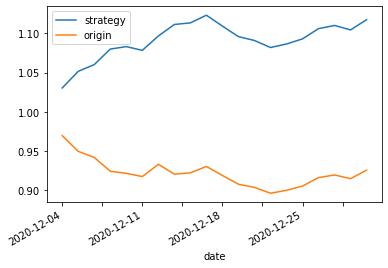

In [118]:
X_test[['strategy', 'origin']].dropna().plot()
plt.gcf().autofmt_xdate()
plt.show()